In [1]:
import numpy as np
import pandas as pd

## P-value Coin check.

In [54]:
n = 10_000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(10, 0.5))  # Кол-во бросков монеты в эксперименте + вероятность выпадения Орла

df = pd.DataFrame({"exp": result})
df["difference"] = abs(df["exp"] - 5)  # Считаем отклонения от нормы и без учета знака, так как двухсторонняя проверка

# Посчитаем потенциальный FPR для каждого полученного отклонения от нормы  
diff = df["difference"].unique().tolist()
diff.sort()

for i in diff:
    result = (df["difference"] >= i).mean()
    print(f"Difference: {i}, P-value[potential FPR]: {result:4f}")

Difference: 0, P-value[potential FPR]: 1.000000
Difference: 1, P-value[potential FPR]: 0.757300
Difference: 2, P-value[potential FPR]: 0.351500
Difference: 3, P-value[potential FPR]: 0.112400
Difference: 4, P-value[potential FPR]: 0.022900
Difference: 5, P-value[potential FPR]: 0.000900


Итого. Мы получили шкалу оценки `P-value` (потенциального `FPR`) для каждого из возможных отклонений от нормы. И трактовать это нужно следующим образом:
- При отклонении от нормы в 0 "Орлов" мы в 100% можем получать ложное срабатывание
- При отклонении от нормы в 1 "Орла" мы в 75% можем получать ложное срабатывание
- При отклонении от нормы в 2 "Орла" мы в 35% можем получать ложное срабатывание
- При отклонении от нормы в 3 "Орла" мы в 11% можем получать ложное срабатывание
- При отклонении от нормы в 4 "Орла" мы в 2% можем получать ложное срабатывание
- При отклонении от нормы в 5 "Орла" мы в 0% можем получать ложное срабатывание

## P-value Satisfaction check.

In [138]:
sample_size = 115
baseline = 0.8

n = 10_000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, baseline))  # Размер выборки в эксперименте + вероятность удовлетворенности (baseline)

df = pd.DataFrame({"exp": result})
df["difference"] = df["exp"] - sample_size * baseline  # Считаем отклонения от нормы и только в сторону уменьшения.

# Посчитаем потенциальный FPR для каждого полученного отклонения от нормы, но только в меньшую сторону
diff = df[df["difference"] <= 0]["difference"].unique().tolist()
diff.sort()

for i in diff[::-1]:
    result = (df["difference"] <= i).mean()
    print(f"Difference: {i}, P-value[potential FPR]: {result:.4f}")

Difference: 0.0, P-value[potential FPR]: 0.5348
Difference: -1.0, P-value[potential FPR]: 0.4498
Difference: -2.0, P-value[potential FPR]: 0.3632
Difference: -3.0, P-value[potential FPR]: 0.2777
Difference: -4.0, P-value[potential FPR]: 0.2067
Difference: -5.0, P-value[potential FPR]: 0.1464
Difference: -6.0, P-value[potential FPR]: 0.1013
Difference: -7.0, P-value[potential FPR]: 0.0685
Difference: -8.0, P-value[potential FPR]: 0.0437
Difference: -9.0, P-value[potential FPR]: 0.0277
Difference: -10.0, P-value[potential FPR]: 0.0169
Difference: -11.0, P-value[potential FPR]: 0.0099
Difference: -12.0, P-value[potential FPR]: 0.0053
Difference: -13.0, P-value[potential FPR]: 0.0030
Difference: -14.0, P-value[potential FPR]: 0.0014
Difference: -15.0, P-value[potential FPR]: 0.0004
Difference: -16.0, P-value[potential FPR]: 0.0002


Итого. Мы получили шкалу оценки `P-value` (потенциального `FPR`) для каждого из возможных отклонений от нормы. И трактовать это нужно следующим образом:
- При отклонении от нормы в -8 "Людей" мы в 4% можем получать ложное срабатывание


## P-value with statistical test

In [139]:
from statsmodels.stats.proportion import proportions_ztest

In [140]:
# Monte-Carlo
sample_size = 115
baseline = 0.8

n = 10_000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, baseline))

df = pd.DataFrame({"exp": result})
df["difference"] = df["exp"] - sample_size * baseline

(df["difference"] <= -8).mean()

0.0437

In [141]:
# StatTest
proportions_ztest(84, sample_size, baseline, alternative="smaller")[1]

0.046362399106540116

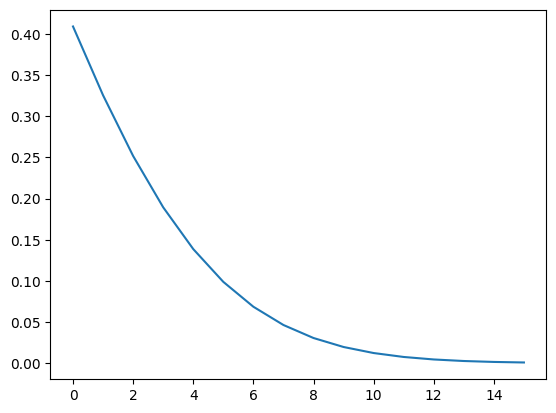

In [153]:
# Рассчитаем "шкалу" p-values через СтатТест для данных из раздела P-value Satisfaction check
pvals = df[df["difference"] < 0].drop_duplicates() # Оставляем только уникальные комбинации людей/отклонений в эксперименте и только < 0
pvals["p_value"] = pvals["exp"].apply(lambda x: proportions_ztest(x, sample_size, baseline, alternative="smaller")[1])
pvals.sort_values(by="difference", inplace=True, ascending=False)
pvals.reset_index(inplace=True, drop=True)

 
pvals["p_value"].plot();